In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

In [2]:
path='yelp_academic_dataset_business.json'
business = [json.loads(line) for line in open(path)]

In [3]:
restaurants = [rec for rec in business if rec['categories'] and 'Restaurants' in rec['categories']]

In [5]:
dataset = []
for restaurant in restaurants:
    data = {}
    
    data["stars"] = restaurant["stars"] 
    if(restaurant["attributes"] == None):
        continue
        
    for attribute in restaurant["attributes"].keys():

        if attribute not in ["Ambience","GoodForMeal","BusinessParking"]:
            data[attribute] = restaurant["attributes"][attribute]
            
        else :
            subAttribute = restaurant["attributes"][attribute].replace("{", "").replace("}","")
            subDicts = subAttribute.split(",")

            for subDict in subDicts:
                subKey = subDict.split(":")[0].replace("'","")
                data[attribute + subKey]= subDict.split(":")[1]
                
    dataset.append(data)

In [6]:
print("Data length:")
print(len(dataset))

Data length:
55775


In [7]:
rawDataFrame = pd.DataFrame(dataset)
print("Attributes we have :")
print(rawDataFrame.columns)
print("\n")
print("How many attributes we have:")
print(rawDataFrame.columns.shape)

Attributes we have :
Index(['AcceptsInsurance', 'AgesAllowed', 'Alcohol', 'Ambience casual',
       'Ambience classy', 'Ambience divey', 'Ambience hipster',
       'Ambience intimate', 'Ambience touristy', 'Ambience trendy',
       'Ambience upscale', 'Ambienceromantic', 'BYOB', 'BYOBCorkage',
       'BestNights', 'BikeParking', 'BusinessAcceptsBitcoin',
       'BusinessAcceptsCreditCards', 'BusinessParking lot',
       'BusinessParking street', 'BusinessParking valet',
       'BusinessParking validated', 'BusinessParkinggarage',
       'ByAppointmentOnly', 'Caters', 'CoatCheck', 'Corkage',
       'DietaryRestrictions', 'DogsAllowed', 'DriveThru', 'GoodForDancing',
       'GoodForKids', 'GoodForMeal breakfast', 'GoodForMeal brunch',
       'GoodForMeal dinner', 'GoodForMeal latenight', 'GoodForMeal lunch',
       'GoodForMealdessert', 'HairSpecializesIn', 'HappyHour', 'HasTV',
       'Music', 'NoiseLevel', 'Open24Hours', 'OutdoorSeating',
       'RestaurantsAttire', 'RestaurantsCounter

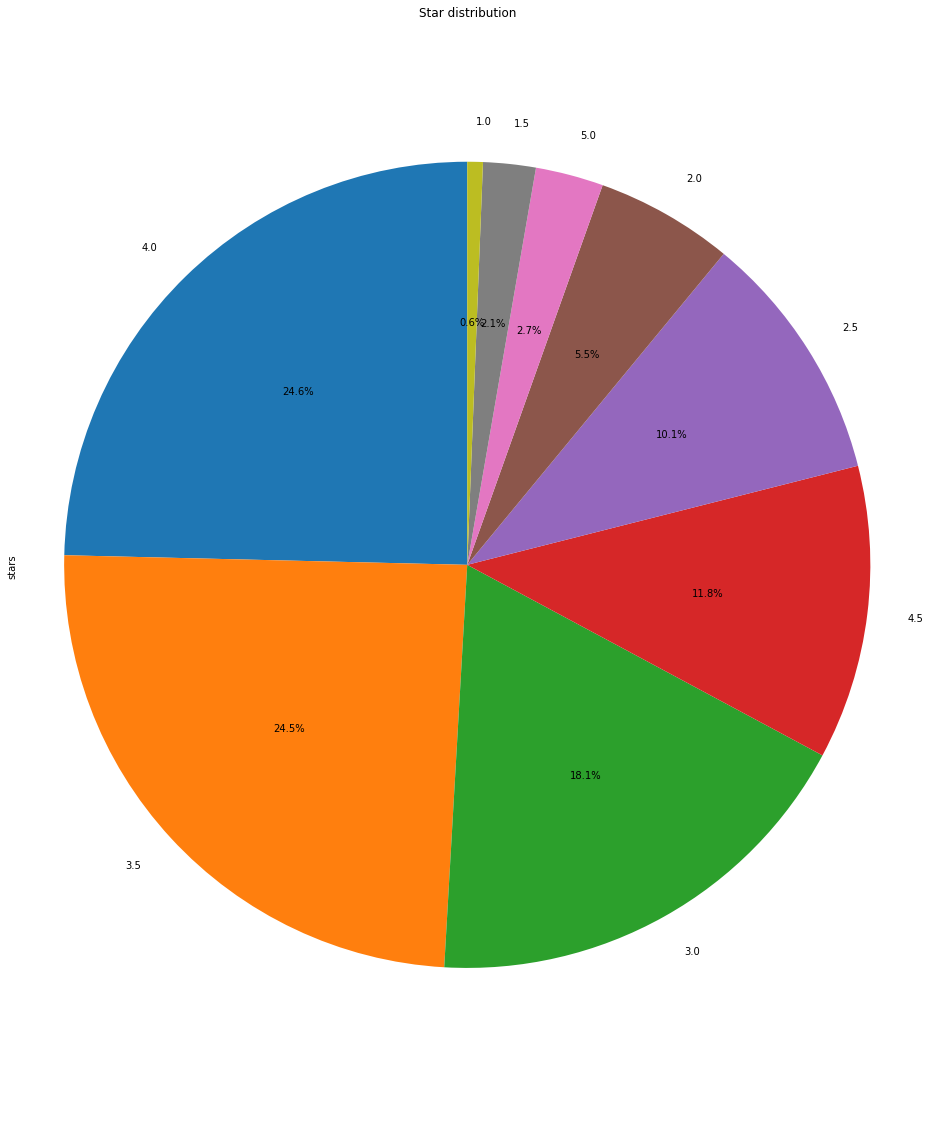

In [8]:
count_star = rawDataFrame["stars"].value_counts()

plt.figure(figsize=(16,20))
plt.title("Star distribution")
count_star.plot.pie(y=count_star.index,
           shadow=False,
           startangle=90,
           autopct='%1.1f%%')
plt.axis('equal')
plt.show()

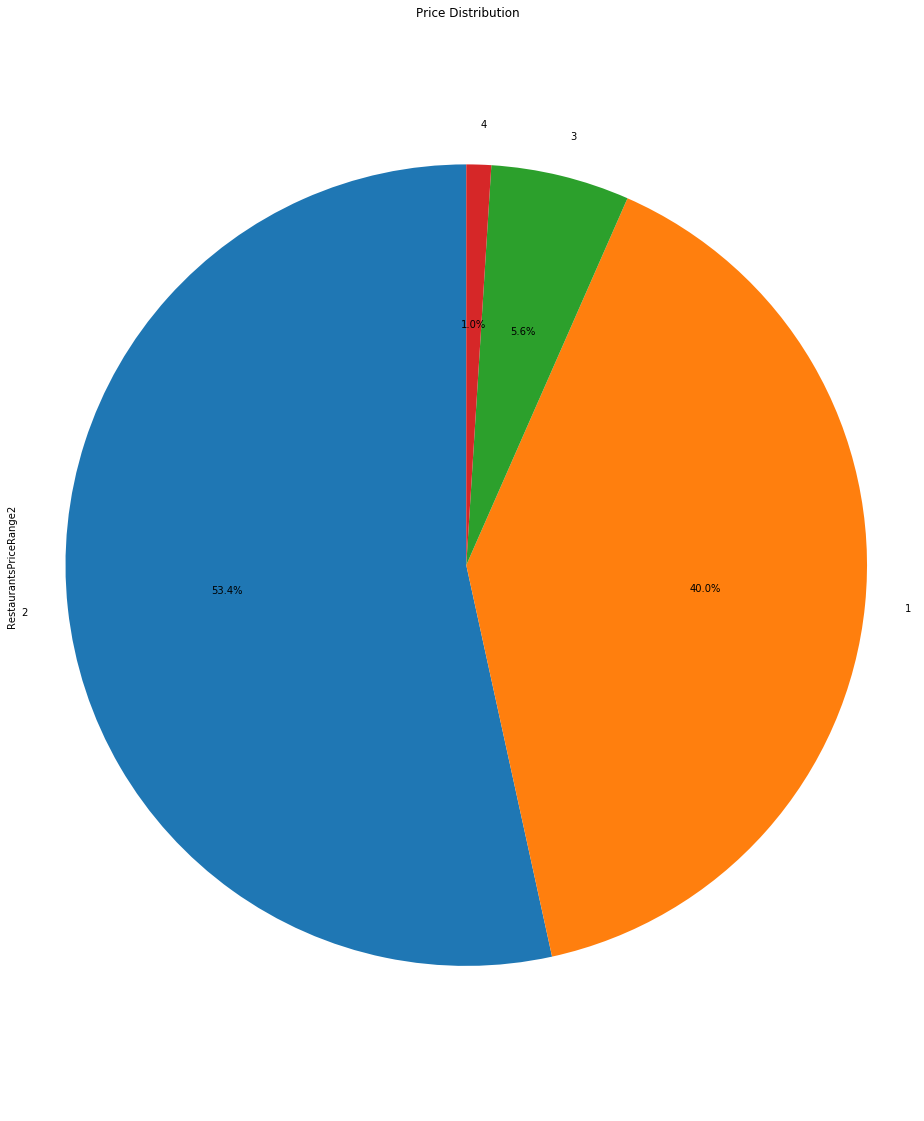

In [9]:
count_price = rawDataFrame["RestaurantsPriceRange2"].value_counts()
plt.figure(figsize=(16,20))
plt.title("Price Distribution")
count_price.plot.pie(y=count_price.index,
           shadow=False,
           startangle=90,
           autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [10]:
# remove the columns with a lot of NUN values
move_line = len(rawDataFrame)/3
i = 0
removeColumn = []
for column in rawDataFrame.columns:
    counts = rawDataFrame[column].isnull().sum()
    if (counts > move_line):
        print("Index: "+ str(i))
        i = i + 1
        print(column + " : "+ str(counts))
        print("")
        removeColumn.append(column)

Index: 0
AcceptsInsurance : 55759

Index: 1
AgesAllowed : 55705

Index: 2
Ambience divey : 28112

Index: 3
BYOB : 54865

Index: 4
BYOBCorkage : 54366

Index: 5
BestNights : 51359

Index: 6
BusinessAcceptsBitcoin : 52590

Index: 7
ByAppointmentOnly : 55254

Index: 8
Caters : 21595

Index: 9
CoatCheck : 50208

Index: 10
Corkage : 55118

Index: 11
DietaryRestrictions : 55638

Index: 12
DogsAllowed : 48064

Index: 13
DriveThru : 49021

Index: 14
GoodForDancing : 49698

Index: 15
HairSpecializesIn : 55768

Index: 16
HappyHour : 49647

Index: 17
Music : 50081

Index: 18
Open24Hours : 55498

Index: 19
RestaurantsCounterService : 55378

Index: 20
Smoking : 50518

Index: 21
WheelchairAccessible : 32046



In [11]:
# After remove the columns, decribe the data
for column in rawDataFrame.columns:
    if column not in removeColumn:
        print(rawDataFrame[column].value_counts(dropna=False))

none             20577
full_bar         16987
NaN              11989
beer_and_wine     6222
Name: Alcohol, dtype: int64
 False    23025
 True     21415
NaN       11335
Name: Ambience casual, dtype: int64
 False    43464
NaN       11335
 True       976
Name: Ambience classy, dtype: int64
 False    43504
NaN       11363
 True       908
Name: Ambience hipster, dtype: int64
 False    43833
NaN       11335
 True       607
Name: Ambience intimate, dtype: int64
 False    44240
NaN       11335
 True       200
Name: Ambience touristy, dtype: int64
 False    42225
NaN       11335
 True      2215
Name: Ambience trendy, dtype: int64
 False    43997
NaN       11335
 True       443
Name: Ambience upscale, dtype: int64
 False    43861
NaN       11335
 True       579
Name: Ambienceromantic, dtype: int64
True     28955
NaN      17632
False     9188
Name: BikeParking, dtype: int64
True     46439
NaN       7324
False     2012
Name: BusinessAcceptsCreditCards, dtype: int64
 False    27839
 True     19052


In [12]:
# delete removed columns
for column in removeColumn:
    del rawDataFrame[column]

In [13]:
columns = rawDataFrame.columns
rawDataFrame[columns] = rawDataFrame[columns].astype('object')

In [14]:
## one hot encode variables
print("Get dummy variables for all categorical predictor variables: ")
encoding_data = pd.get_dummies(rawDataFrame.iloc[:,:-1])

encoding_data["stars"] = rawDataFrame["stars"]

Get dummy variables for all categorical predictor variables: 


In [15]:
encoding_data[:3]

,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,Ambience casual_ False,Ambience casual_ True,Ambience classy_ False,Ambience classy_ True,Ambience hipster_ False,Ambience hipster_ True,Ambience intimate_ False,...,RestaurantsReservations_False,RestaurantsReservations_True,RestaurantsTableService_False,RestaurantsTableService_True,RestaurantsTakeOut_False,RestaurantsTakeOut_True,WiFi_free,WiFi_no,WiFi_paid,stars
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,4
1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,4.5
2,1,0,0,1,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,0,4


In [16]:
# Store the feature data
encoding_data.to_csv('dataSet_business.csv', index=False, header = True)